Importing Libraries

In [46]:
from numpy._typing import NBitBase
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [47]:
df = pd.read_csv('/content/Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [48]:
df.shape

(366, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


Data Cleaning

In [51]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


One null value in the 'winddirection' and 'windspeed' column

In [52]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [53]:
df.rename(str.strip, axis='columns', inplace=True)
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

Null value imputation

In [54]:
for col in df.columns:

  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

Exploratory Data Analysis

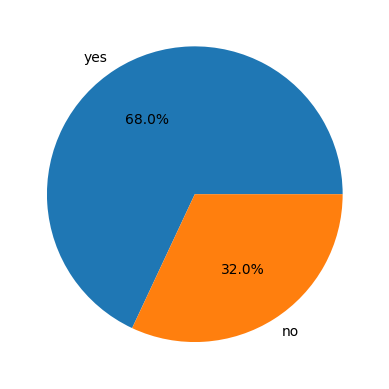

In [55]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct = '%1.1f%%')
plt.show()

In [56]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [57]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


Distribution of the continuous features

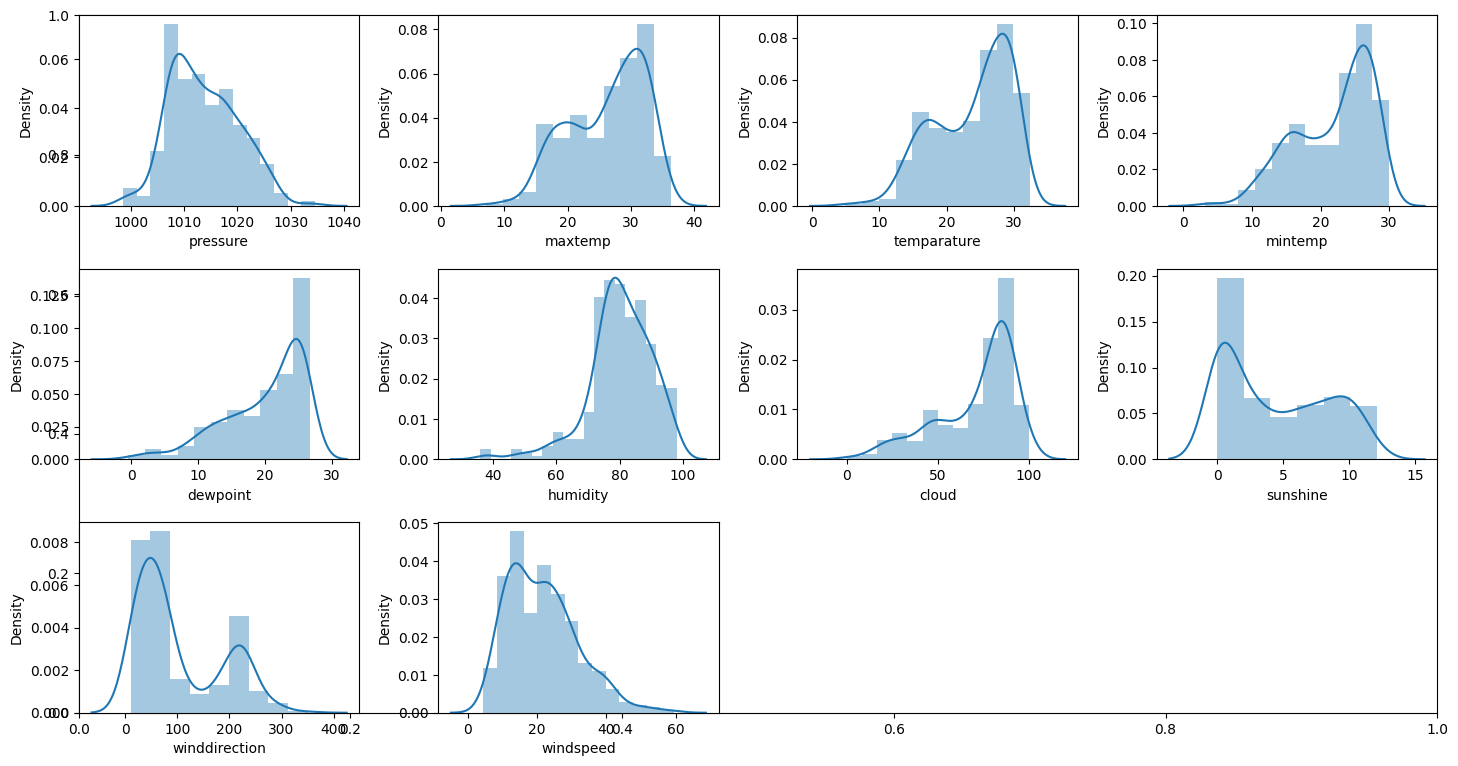

In [58]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

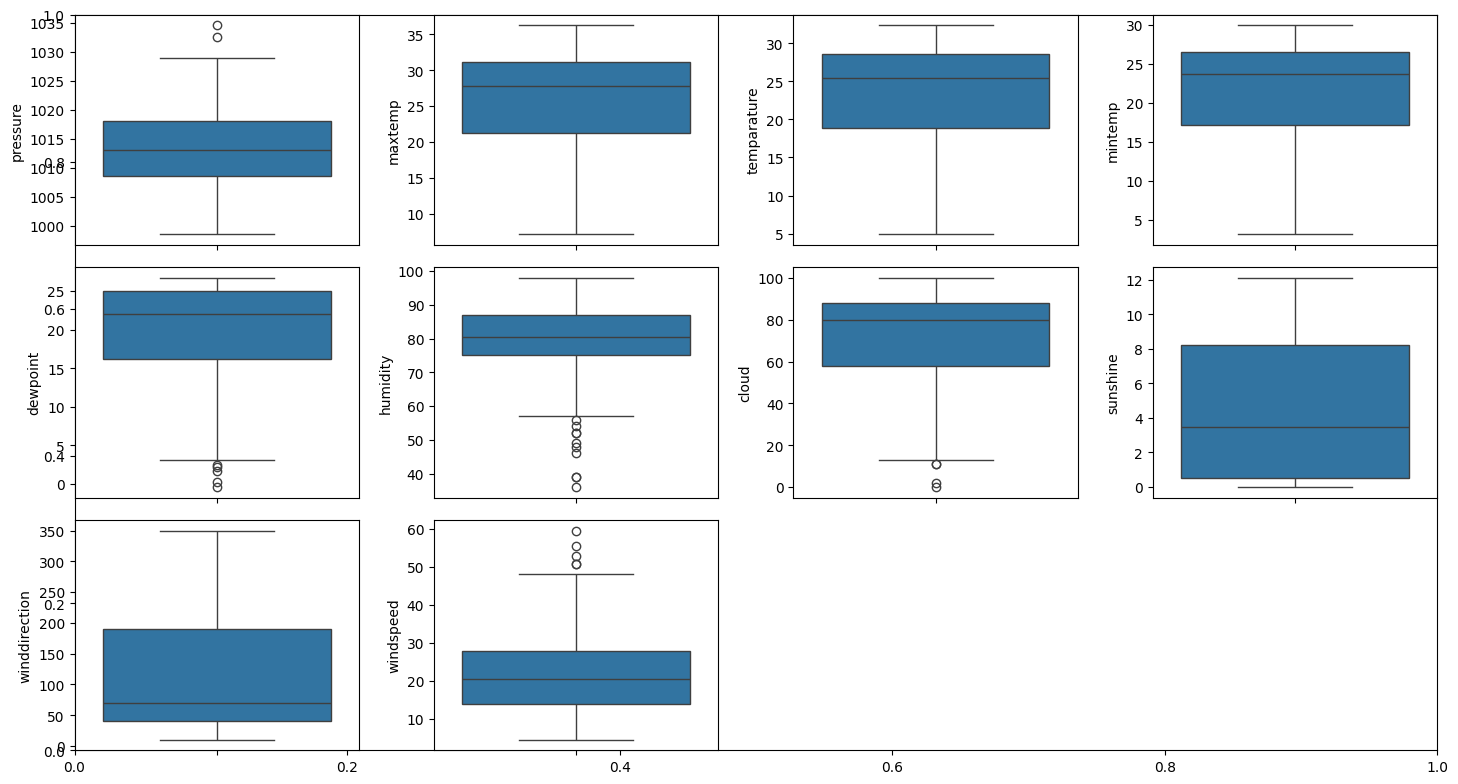

In [59]:
plt.subplots(figsize = (15,8))

for i, col in enumerate(features):
  plt.subplot(3,4,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [60]:
df.replace({'yes':1, 'no':0}, inplace = True)

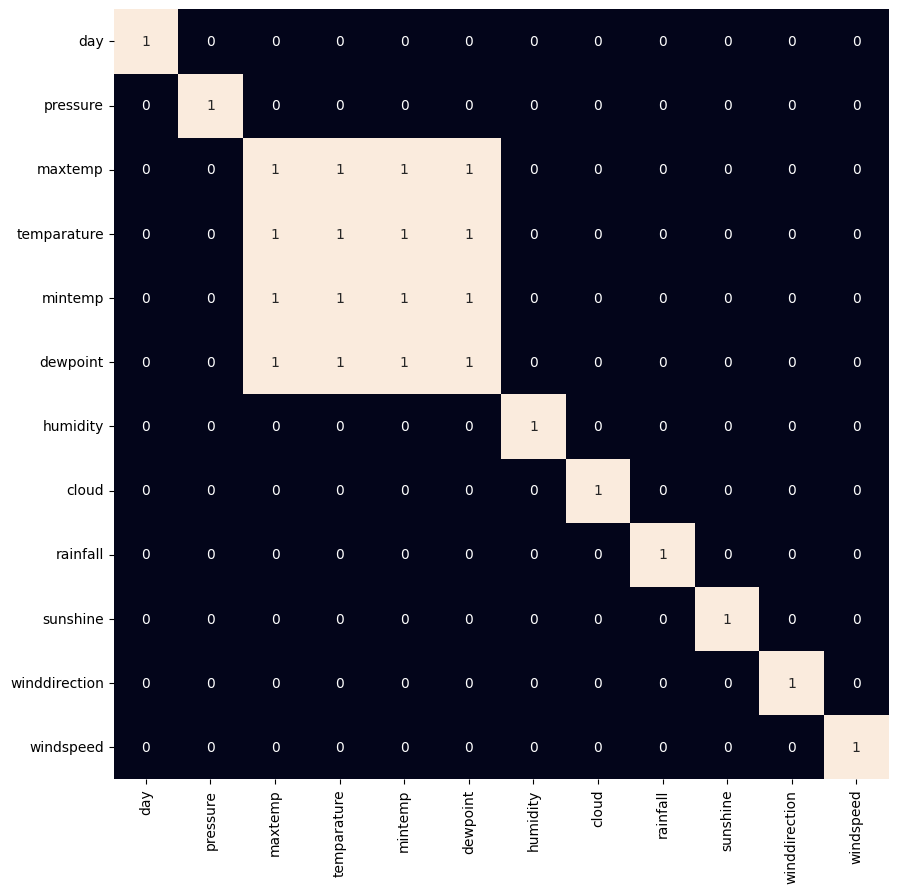

In [61]:
plt.figure(figsize = (10,10))
sb.heatmap(df.corr() > 0.8,
           annot = True,
           cbar = False)
plt.show()

Remove high correlated features 'maxtemp' and 'mintemp'

In [62]:
df.drop(['maxtemp', 'mintemp'], axis = 1, inplace=True)

Model Training

In [63]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

Balance the dataset

In [64]:
X_train, X_val,\
y_train, y_val = train_test_split(features,
                                  target,
                                  test_size=0.2,
                                  stratify = target,
                                  random_state=2)

ros = RandomOverSampler(sampling_strategy = 'minority',
                        random_state=22)
X,y = ros.fit_resample(X_train, y_train)


In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

Define all models

In [66]:
models = [
    LogisticRegression(max_iter=1000),
    SVC(kernel='rbf', probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]


In [67]:
for model in models:
    model.fit(X, y)

    print(f'{type(model).__name__} :')

    train_preds = model.predict_proba(X)
    print('Training ROC-AUC : ', metrics.roc_auc_score(y, train_preds[:, 1]))

    val_preds = model.predict_proba(X_val)
    print('Validation ROC-AUC : ', metrics.roc_auc_score(y_val, val_preds[:, 1]))

    print()


LogisticRegression :
Training ROC-AUC :  0.8893209767430116
Validation ROC-AUC :  0.8966666666666667

SVC :
Training ROC-AUC :  0.9026413474407211
Validation ROC-AUC :  0.8858333333333333

DecisionTreeClassifier :
Training ROC-AUC :  1.0
Validation ROC-AUC :  0.6908333333333333

RandomForestClassifier :
Training ROC-AUC :  1.0
Validation ROC-AUC :  0.8858333333333334

GaussianNB :
Training ROC-AUC :  0.8763667584151915
Validation ROC-AUC :  0.9025000000000001

KNeighborsClassifier :
Training ROC-AUC :  0.9467185172091613
Validation ROC-AUC :  0.8445833333333332

XGBClassifier :
Training ROC-AUC :  0.9999999999999999
Validation ROC-AUC :  0.8391666666666666



Model evalution

In [68]:
from sklearn.metrics import confusion_matrix

for model in models:
    model.fit(X, y)

    print(f"\nModel: {type(model).__name__}")

    train_preds = model.predict(X)
    train_cm = confusion_matrix(y, train_preds)
    print("Training Confusion Matrix:")
    print(train_cm)

    val_preds = model.predict(X_val)
    val_cm = confusion_matrix(y_val, val_preds)
    print("Validation Confusion Matrix:")
    print(val_cm)



Model: LogisticRegression
Training Confusion Matrix:
[[151  48]
 [ 35 164]]
Validation Confusion Matrix:
[[18  6]
 [ 5 45]]

Model: SVC
Training Confusion Matrix:
[[155  44]
 [ 23 176]]
Validation Confusion Matrix:
[[16  8]
 [ 3 47]]

Model: DecisionTreeClassifier
Training Confusion Matrix:
[[199   0]
 [  0 199]]
Validation Confusion Matrix:
[[15  9]
 [ 7 43]]

Model: RandomForestClassifier
Training Confusion Matrix:
[[199   0]
 [  0 199]]
Validation Confusion Matrix:
[[13 11]
 [ 6 44]]

Model: GaussianNB
Training Confusion Matrix:
[[156  43]
 [ 35 164]]
Validation Confusion Matrix:
[[17  7]
 [ 4 46]]

Model: KNeighborsClassifier
Training Confusion Matrix:
[[180  19]
 [ 39 160]]
Validation Confusion Matrix:
[[18  6]
 [ 9 41]]

Model: XGBClassifier
Training Confusion Matrix:
[[199   0]
 [  0 199]]
Validation Confusion Matrix:
[[14 10]
 [ 6 44]]


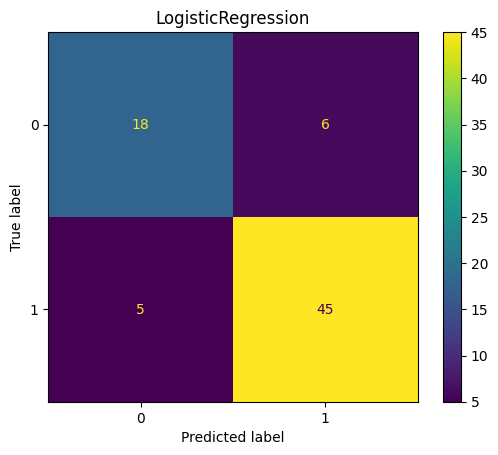

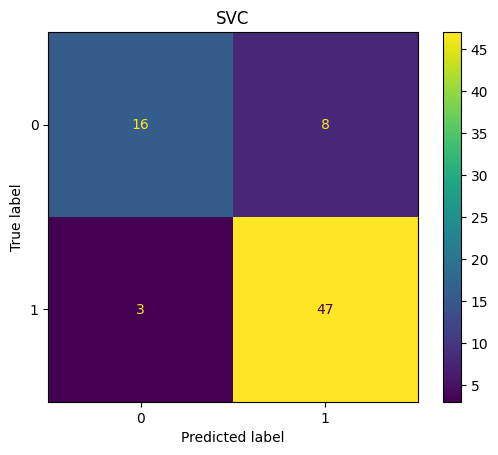

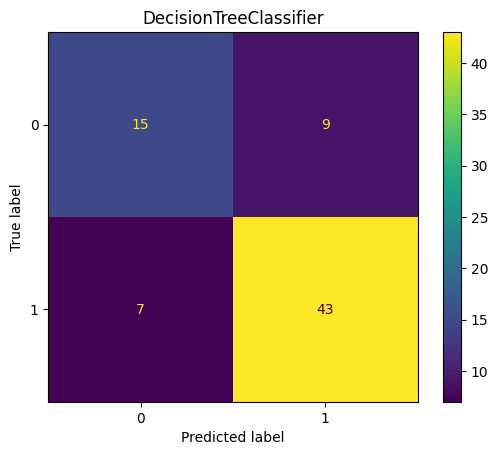

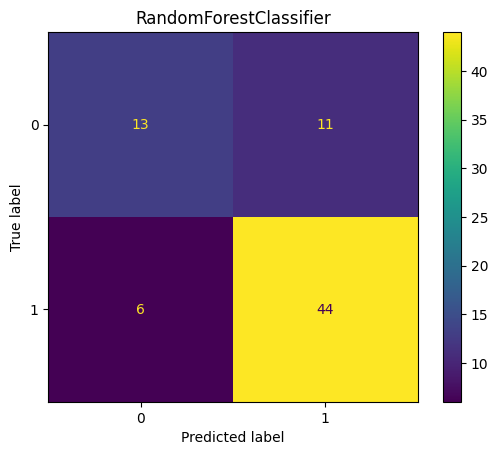

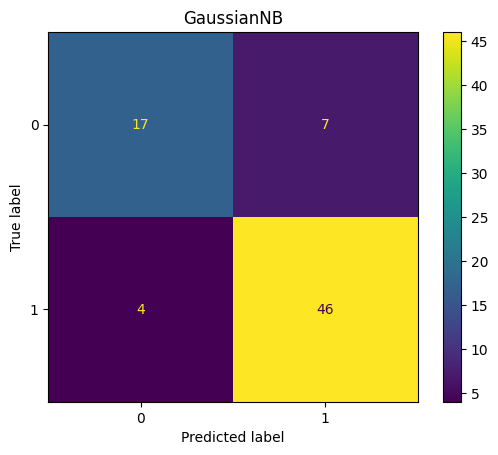

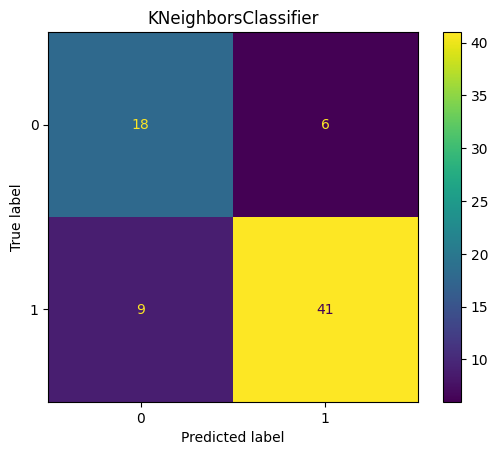

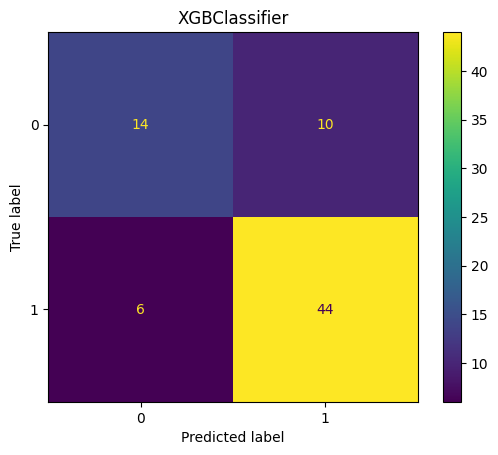

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for model in models:
    ConfusionMatrixDisplay.from_estimator(model, X_val, y_val)
    plt.title(type(model).__name__)
    plt.show()


Classification report

In [70]:
from sklearn import metrics

for model in models:
    print(f"\nModel: {type(model).__name__}")

    y_pred = model.predict(X_val)

    print(metrics.classification_report(y_val, y_pred))



Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.88      0.90      0.89        50

    accuracy                           0.85        74
   macro avg       0.83      0.82      0.83        74
weighted avg       0.85      0.85      0.85        74


Model: SVC
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74


Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.83      0.86      0.84        50

    accuracy                           0.78        74
   macro avg       0.75      0.74      0.75        74
weig

In [71]:
!pip install joblib

Create Output Folder

In [72]:
import os

output_dir = "model_outputs"
os.makedirs(output_dir, exist_ok=True)

Save All Trained Models

In [73]:
import joblib

for model in models:
    model_name = type(model).__name__
    model_path = f"{output_dir}/{model_name}_model.pkl"

    joblib.dump(model, model_path)
    print(f"Saved model: {model_path}")


Saved model: model_outputs/LogisticRegression_model.pkl
Saved model: model_outputs/SVC_model.pkl
Saved model: model_outputs/DecisionTreeClassifier_model.pkl
Saved model: model_outputs/RandomForestClassifier_model.pkl
Saved model: model_outputs/GaussianNB_model.pkl
Saved model: model_outputs/KNeighborsClassifier_model.pkl
Saved model: model_outputs/XGBClassifier_model.pkl


Save Classification Reports

In [74]:
from sklearn import metrics

report_file = f"{output_dir}/classification_reports.txt"

with open(report_file, "w") as f:
    for model in models:
        model_name = type(model).__name__
        y_pred = model.predict(X_val)

        report = metrics.classification_report(y_val, y_pred)

        f.write(f"\nModel: {model_name}\n")
        f.write(report)
        f.write("\n" + "="*60 + "\n")

print("Saved classification reports to:", report_file)


Saved classification reports to: model_outputs/classification_reports.txt


Save Confusion Matrices as Images

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for model in models:
    model_name = type(model).__name__

    disp = ConfusionMatrixDisplay.from_estimator(model, X_val, y_val)
    plt.title(model_name)

    image_path = f"{output_dir}/{model_name}_confusion_matrix.png"
    plt.savefig(image_path)
    plt.close()

    print(f"Saved confusion matrix: {image_path}")


Saved confusion matrix: model_outputs/LogisticRegression_confusion_matrix.png
Saved confusion matrix: model_outputs/SVC_confusion_matrix.png
Saved confusion matrix: model_outputs/DecisionTreeClassifier_confusion_matrix.png
Saved confusion matrix: model_outputs/RandomForestClassifier_confusion_matrix.png
Saved confusion matrix: model_outputs/GaussianNB_confusion_matrix.png
Saved confusion matrix: model_outputs/KNeighborsClassifier_confusion_matrix.png
Saved confusion matrix: model_outputs/XGBClassifier_confusion_matrix.png


Save ROC-AUC Scores

In [76]:
roc_file = f"{output_dir}/roc_auc_scores.txt"

with open(roc_file, "w") as f:
    for model in models:
        model_name = type(model).__name__
        val_preds = model.predict_proba(X_val)
        roc_score = metrics.roc_auc_score(y_val, val_preds[:,1])

        f.write(f"{model_name} ROC-AUC: {roc_score}\n")

print("Saved ROC-AUC scores to:", roc_file)


Saved ROC-AUC scores to: model_outputs/roc_auc_scores.txt


Zip Everything for Download

In [77]:
import shutil

shutil.make_archive("rainfall_ml_results", 'zip', output_dir)
print("Created ZIP file: rainfall_ml_results.zip")


Created ZIP file: rainfall_ml_results.zip
